In [2]:
# Correspondences between different convolutional layers
# P571
from sklearn.datasets import load_sample_image
import numpy as np
china = load_sample_image("china.jpg")/255
flower=load_sample_image("flower.jpg")/255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

(427, 640, 3)
(2, 427, 640, 3)


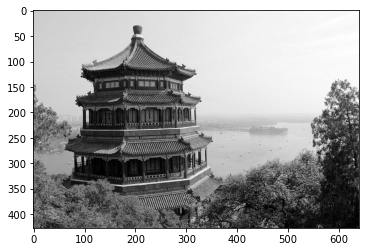

In [4]:
print(china.shape)
print(images.shape)
plt.imshow(china[:, :, 1], cmap="gray")

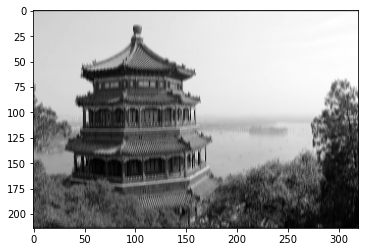

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
# create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
# row, column,channels, number of filters
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=2, padding="SAME")
# images is the input mini-batch (4D tensor)
# padding=" SAME" is zero padding
# padding can also be ="VALID" ( must be either same or valid)
plt.imshow(outputs[0, :, :, 0], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

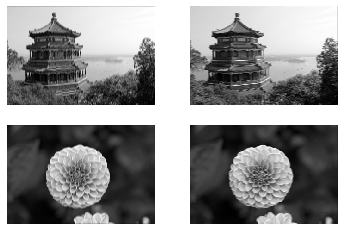

In [6]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

In [7]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same",
                           activation="relu")
# a layer with 32 filters, each 3 *3 , using stride of 1 and "same "padding

In [8]:
# tensorflow implementation of a max pooling layer
# padding is default to "valid"
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [9]:
# implementation of average pooling alyer, which uses the avg instead of max num
avg_pool = keras.layers.AvgPool2D(pool_size=2)

In [10]:
# implementation of depthwise max pooling layer
output = tf.nn.max_pool(images,
                        ksize=(1, 1, 1, 3),
                        strides=(1, 1, 1, 3),
                        padding="VALID")
# to include this as a layer in Keras models, wrap it in a Lambda layer
# or create a custom Keras layer
depth_pool = keras.layers.Lambda( lambda X: tf.nn.max_pool(X,
                                                        ksize=(1,1,1,3),
                                                        strides=(1,1,1,3),
                                                        padding="VALID"))

In [11]:
# globalavgpooling
global_avg_pool = keras.layers.GlobalAvgPool2D()
# which is equivalent to
global_avg_pool = keras.layers.Lambda(lambda X:tf.reduce_mean(X, axis=[1, 2]))
# height and width

In [12]:
# simple CNN usage on fashion MNIST
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [13]:
X_train.shape

(55000, 28, 28)

In [14]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [15]:
X_train.shape
# np. newaxisは次元を一つ追加する

(55000, 28, 28, 1)

In [62]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64,7,activation="relu",padding="SAME",input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128,3,activation="relu",padding="SAME"),
    keras.layers.Conv2D(128,3,activation="relu",padding="SAME"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256,3,activation="relu",padding="SAME"),
    keras.layers.Conv2D(256,3,activation="relu",padding="SAME"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
    ])
# first layer: 64 filters of 7*7, default stride of 1, input_shape=[28, 28, 1](1 is the
# channel)

# second layer: pooling layer size of 2, dividing each spatial dimension by a factor of 2

# double filter numbers because maxpooling2D(2) everytime(no risk of computational load)
model.compile(optimizer="nadam", metrics=["accuracy"], loss="sparse_categorical_crossentropy" )
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
print(score)
X_new = X_test[:10]

313/313 [==============================] - 15s 47ms/step - loss: 0.3824 - accuracy: 0.8617
[0.3824222981929779, 0.8616999983787537]
1/1 [==============================] - 0s 280ms/step
[[1.90024906e-07 1.41852439e-07 2.19890836e-07 3.77622172e-07
  6.52568474e-07 1.68503437e-03 6.14855438e-08 5.85783496e-02
  3.04093237e-06 9.39731896e-01]
 [9.14509565e-06 4.18379970e-10 9.83558118e-01 1.86494276e-07
  1.96057605e-03 2.04574094e-10 1.44718168e-02 1.03364102e-10
  9.25924013e-08 5.18869739e-11]
 [3.88004265e-23 1.00000000e+00 1.17827483e-22 1.66433656e-14
  1.33741095e-18 3.78052616e-25 2.00200472e-15 2.09388675e-21
  6.63260099e-25 3.96346009e-22]
 [1.72430873e-23 1.00000000e+00 5.13683029e-23 1.24931058e-14
  5.97468110e-19 1.32174434e-25 1.20591276e-15 4.91496897e-22
  1.51902785e-25 5.69946009e-23]
 [2.59504378e-01 8.62280664e-04 4.43351753e-02 4.97192144e-02
  1.71129182e-02 4.83113370e-04 6.26000941e-01 6.49062786e-05
  1.86571828e-03 5.14111889e-05]
 [8.52514574e-16 1.00000000e+0

In [72]:
aa = np.array([1,2])
bb=np.array([3,4])
cc = np.concatenate((aa,bb))
cc

array([1, 2, 3, 4])

In [29]:
# implementation of a Res-Net CNN
# Residual units
keras.backend.clear_session()
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            keras.layers.Conv2D(filters,3,strides=strides, padding="SAME",use_bias=False ),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, 3, strides=1, padding="SAME",use_bias=False),
            keras.layers.BatchNormalization()           
        ]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1,strides=strides,padding="SAME",use_bias=False),
                keras.layers.BatchNormalization()]
    def call(self, inputs):
        Z=inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64 ,7 ,strides=2, input_shape=[28, 28, 1], 
                              padding="SAME", use_bias=False))
# input_shape=[224 , 224 ,3]
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64]*3 +[128]*4 +[256]*6 + [512]*3:
    strides =1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [30]:
[64]*3 +[128]*4 +[256]*6 + [512]*3

[64, 64, 64, 128, 128, 128, 128, 256, 256, 256, 256, 256, 256, 512, 512, 512]

In [33]:
model.compile(optimizer="nadam", metrics=["accuracy"],loss="sparse_categorical_crossentropy")

In [ ]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=1)

In [6]:
# using pretrained models from keras
keras.backend.clear_session()
#load ResNet50 from applications package
model = keras.applications.resnet50.ResNet50(weights="imagenet")
# this model expects 224*224 piexel images
# have to resize it to use
images_resized = tf.image.resize(images, [224,224])
# this doesnt preserve the aspect ratio,
# this requires tf.image.crop_and_resize()

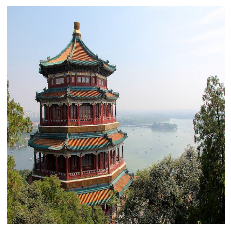

In [7]:
plot_color_image(images_resized[0])
plt.show()

In [8]:
# the model uses batchnormalization and expect 0 - 255 to be the input
inputs = keras.applications.resnet50.preprocess_input(images_resized*255)
Y_proba=model.predict(inputs)

1/1 [==============================] - 1s 502ms/step


In [9]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
# decode_predictions provides estimated probability of each predicted class,
# top=n returns the top n mostly like classes
for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print(" {} - {:12s}{:.2f}%".format(class_id, name, y_proba*100))
    print()

35363/35363 [==============================] - 0s 1us/step
Image #0
 n02825657 - bell_cote   82.35%
 n03877845 - palace      6.75%
 n03781244 - monastery   4.19%

Image #1
 n03530642 - honeycomb   49.83%
 n13040303 - stinkhorn   33.96%
 n02206856 - bee         4.35%



In [24]:
# Pretrained models for transfer learning
import tensorflow_datasets as tfds
datasets, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples # 3670
class_names = info.features["label"].names# ["dandelion", "daisy"..]
n_classes = info.features["label"].num_classes # 5

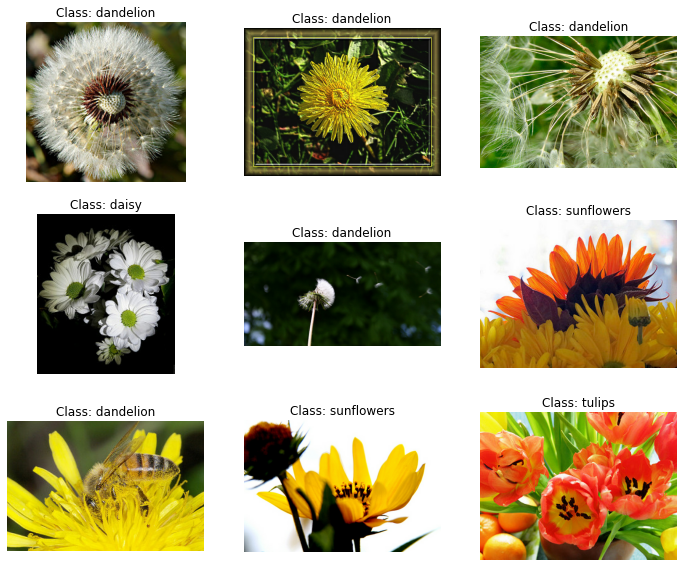

In [25]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)
plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

In [26]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label
batch_size = 32
train_set = train_set_raw.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)


In [27]:
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
# include_top = False excludes the global average pooling layer and the
# dense output layer
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.Model(inputs = base_model.input, outputs = output)

In [28]:
for layer in base_model.layers:
    layer.trainable = False
# freeze the weights of the pretrained layers

In [29]:
optimizer = keras.optimizers.legacy.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
             metrics=["accuracy"])
history=model.fit(train_set, epochs=1, validation_data = valid_set)

86/86 [==============================] - 76s 873ms/step - loss: 1.4677 - accuracy: 0.7943 - val_loss: 1.0535 - val_accuracy: 0.8367


In [30]:
for layer in base_model.layers:
    layer.trainable = True
# unfreeze the weights of the pretrained layers

In [31]:
optimizer = keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
             metrics=["accuracy"])
history=model.fit(train_set, epochs=1, validation_data = valid_set)

86/86 [==============================] - 346s 4s/step - loss: 0.4382 - accuracy: 0.8677 - val_loss: 0.4756 - val_accuracy: 0.8748


In [ ]:
# a second dense output layer with four units on top of the global average pooling layer
# (the object's center（座標）と height, weight)の四つの輸出量をoutputとする

In [ ]:
base_model = keras.applications.xception.Xception(weights="imagenet",include_top=False)

avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
class_output = keras.layers.Dense(n_classes, activation="softmax")(avg)
loc_output = keras.layers.Dense(4)(avg)
model = keras.Model(inputs = base_model.input,
                    outputs=[class_output, loc_output])
model.compile(loss=["sparse_categorical_crossentropy","mse"],
              loss_weights=[0.8, 0.2],
              optimizer=optimizer, metrics=["accuracy"])
# however, these datas are not labeled

In [ ]:
# other types of tensorflow convolution operations

In [23]:
from tensorflow.python.client import device_lib
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[]

In [5]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7652137757618644143
 xla_global_id: -1]